In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd

In [2]:
anime_recommand_raw = pd.read_csv("./data/anime_recommend.csv")
rating_recommand_raw = pd.read_csv("./data/rating_recommend.csv")
data_anime_raw = pd.read_csv("./data/dataanime.csv")

In [3]:
anime_recommand_raw.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating_recommand_raw.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
data_anime_raw.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


## Filter the anime

In [6]:

# Select only the anime in the dataset data_anime
anime_id_selected = []

for title in data_anime_raw['Title']:
    current_id = anime_recommand_raw[anime_recommand_raw['name'] == title]['anime_id'].values
    if len( current_id ) > 0:
        anime_id_selected.append( current_id[0] )

In [7]:
anime_id_selected.sort()
anime_id_selected = np.array(anime_id_selected)

In [8]:
anime_id_selected

array([    1,     5,     6, ..., 34349, 34445, 34514], dtype=int64)

## Get the rating of the selected animes from the first 5000 users

In [89]:
rating_table = np.zeros( (5000, len(anime_id_selected)) )

In [9]:
# Not to run if ./data/rating_table.csv exists

# for index, row in rating_recommand_raw.iterrows():
#     if row['user_id'] >= 5000:
#         break
#     if row['anime_id'] in anime_id_selected:
#         rating_table[ row['user_id'] - 1 , np.where( anime_id_selected == row['anime_id'] )[0] ] = row['rating']

In [9]:
# pd.DataFrame(rating_table, columns = list(anime_id_selected) ).to_csv("./data/rating_table.csv")

NameError: name 'rating_table' is not defined

In [10]:
rating_table_df = pd.read_csv("./data/rating_table.csv", index_col = 0)

In [11]:
rating_table_df

,1,5,6,15,16,17,18,20,21,24,...,33988,34076,34103,34136,34240,34284,34299,34349,34445,34514
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,8.0,6.0,0.0,6.0,6.0,6.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,7.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,10.0,0.0,8.0,0.0,7.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dimension Reduction

In [12]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=120)

In [16]:
rating_table = np.array( rating_table_df )

In [17]:
pca.fit(rating_table)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.explained_variance_[:] 

array([381.36735975,  80.55146262,  66.78260242,  59.8750564 ,
        56.55784226,  41.16401642,  31.83319218,  29.99930114,
        27.92294821,  24.85925341,  23.90844632,  20.83010112,
        19.40696733,  18.98337887,  17.83199591,  16.92436579,
        16.14812866,  15.71176947,  15.14526461,  14.46498653,
        14.08362177,  13.90796176,  13.69205235,  13.20012615,
        13.09886528,  12.34213405,  12.2005453 ,  12.05079375,
        11.89737458,  11.69173912,  11.5056386 ,  11.35866   ,
        11.24835587,  11.03627966,  10.87202795,  10.7198803 ,
        10.51024297,  10.4056608 ,  10.3432667 ,  10.21808717,
         9.8701933 ,   9.79040925,   9.60681161,   9.4210894 ,
         9.28329135,   9.25879715,   9.17220479,   8.91809464,
         8.87883157,   8.78313103,   8.74723577,   8.53859869,
         8.46180589,   8.3894934 ,   8.31004167,   8.22831203,
         8.1673681 ,   8.11630663,   8.02552426,   7.92139519,
         7.86579301,   7.80910452,   7.72042391,   7.68

In [23]:
rating_table_pca = pca.transform(rating_table)

In [19]:
pca.score(rating_table) 

-1845.1528357353538

In [20]:
pca.transform(rating_table).shape

(5000, 120)

## K means cluster 

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(rating_table)

In [34]:
kmeans.inertia_ / 5000

2167.837465657602

In [35]:
inertias = np.zeros(30)
for k in range(1,31):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(rating_table)
    inertias[k-1] = kmeans.inertia_ / 5000

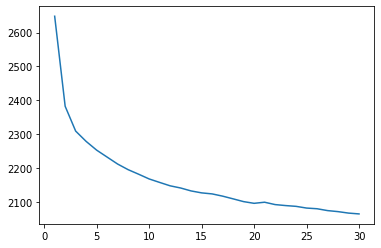

In [36]:
pl.plot(range(1,31), inertias)

In [38]:
from collections import Counter 
Counter( kmeans.predict(rating_table) )

Counter({26: 1752,
         13: 268,
         23: 91,
         14: 244,
         24: 252,
         12: 639,
         0: 388,
         28: 24,
         6: 289,
         18: 118,
         9: 38,
         21: 108,
         16: 221,
         1: 58,
         5: 33,
         15: 124,
         10: 107,
         11: 34,
         17: 54,
         19: 29,
         22: 22,
         2: 8,
         8: 5,
         3: 77,
         20: 7,
         29: 3,
         4: 4,
         25: 1,
         27: 1,
         7: 1})

In [39]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(rating_table)

In [40]:
Counter( kmeans.predict(rating_table) )

Counter({2: 2216, 3: 1605, 1: 854, 0: 325})

In [155]:
# def nmf(X, k):
#     """
#     Args:
#         X (np.array, dim: n,m,4): containing the image channel to be processed
#         k (int): the number of elements to be used in the low rank approximation 
    
#     Returns:
#         X_low_rank_approx (np.array, dim: n,m,4): low rank approximation of X
#     """
    
# #     X_low_rank_approx = np.zeros(X.shape)
# #     for i in range(4):
#     A_0, D, B_0 = np.linalg.svd(X, full_matrices=False)
#     A = np.abs(A_0[:,:k])
#     B = np.abs(B_0[:k,:])

#     for _ in range(65):
#         B = np.nan_to_num(B * (A.T.dot(X))/(A.T.dot(A.dot(B))))
#         A = np.nan_to_num(A * (X.dot(B.T)) / (A.dot(B.dot(B.T))))
#     return A, B